## Perform clustering using K-means

The data specified in the course was unavailable (https://raw.githubusercontent.com/datascienceinc/learn-data-science/master/Introduction-to-K-means-Clustering/Data/data_1024.csv). I am using this one instead https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python

Try to cluster spenders together.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data_in = pd.read_csv("../dataset/Mall_Customers.csv")

In [2]:
data_in.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [3]:
# shuffle so that order does not affect anything
data_in = data_in.sample(frac=1)

In [4]:
data_in.drop("CustomerID", axis=1, inplace=True)

### Initial plots

Gender does not seem to be all that helpful.

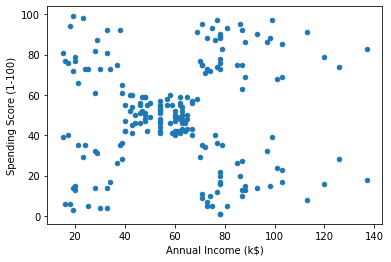

In [5]:
data_in.plot(x="Annual Income (k$)", y="Spending Score (1-100)", kind="scatter")

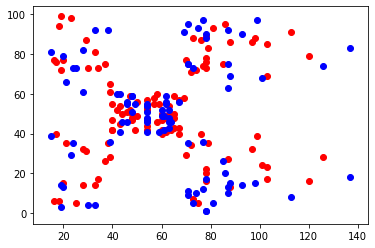

In [6]:
fig, ax = plt.subplots()
plt.scatter(data_in.loc[data_in["Gender"] == "Female", "Annual Income (k$)"], 
            data_in.loc[data_in["Gender"] == "Female", "Spending Score (1-100)"], color="r")
plt.scatter(data_in.loc[data_in["Gender"] != "Female", "Annual Income (k$)"], 
            data_in.loc[data_in["Gender"] != "Female", "Spending Score (1-100)"], color="b")
plt.show()

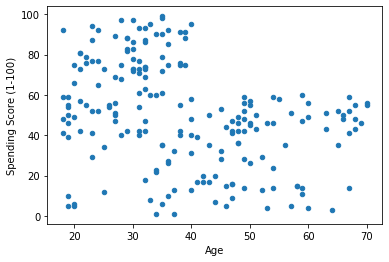

In [7]:
data_in.plot(x="Age", y="Spending Score (1-100)", kind="scatter")

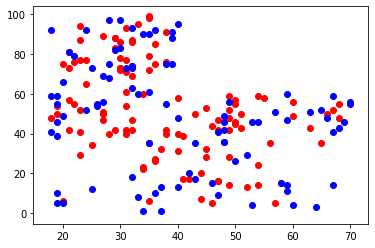

In [8]:
fig, ax = plt.subplots()
plt.scatter(data_in.loc[data_in["Gender"] == "Female", "Age"], 
            data_in.loc[data_in["Gender"] == "Female", "Spending Score (1-100)"], color="r")
plt.scatter(data_in.loc[data_in["Gender"] != "Female", "Age"], 
            data_in.loc[data_in["Gender"] != "Female", "Spending Score (1-100)"], color="b")
plt.show()

In [12]:
data_in.drop("Gender", axis=1, inplace=True)

### Clustering

In [71]:
from sklearn.cluster import KMeans
kmeans_model = KMeans(n_clusters=6, max_iter=1000).fit(data_in)

In [72]:
kmeans_model.labels_

array([0, 1, 5, 1, 3, 4, 0, 2, 5, 3, 1, 1, 1, 2, 5, 1, 5, 3, 3, 0, 4, 0,
       3, 5, 2, 2, 3, 3, 0, 5, 5, 4, 4, 4, 1, 1, 3, 3, 0, 0, 3, 5, 2, 3,
       4, 3, 2, 3, 5, 4, 2, 1, 3, 1, 1, 3, 0, 0, 5, 3, 1, 5, 5, 2, 2, 4,
       3, 0, 0, 2, 1, 5, 5, 5, 0, 5, 2, 0, 1, 3, 3, 3, 1, 0, 5, 3, 0, 3,
       1, 0, 2, 4, 3, 0, 4, 0, 5, 1, 1, 1, 4, 5, 3, 5, 5, 3, 5, 4, 0, 1,
       3, 0, 3, 1, 5, 1, 2, 5, 4, 1, 4, 5, 2, 5, 0, 2, 5, 1, 2, 5, 1, 5,
       0, 1, 1, 3, 1, 3, 3, 1, 1, 1, 4, 5, 5, 5, 0, 0, 1, 0, 1, 4, 0, 5,
       3, 4, 1, 4, 2, 5, 1, 0, 3, 1, 0, 1, 3, 3, 0, 2, 4, 1, 4, 3, 5, 3,
       2, 5, 1, 0, 0, 5, 1, 1, 1, 2, 0, 1, 0, 2, 3, 3, 4, 2, 5, 1, 3, 1,
       0, 0])

#### Grab the labels

In [73]:
zipped_list = list(zip(np.array(data_in), kmeans_model.labels_))

In [74]:
centroids = kmeans_model.cluster_centers_

In [75]:
centroids

array([[41.68571429, 88.22857143, 17.28571429],
       [56.15555556, 53.37777778, 49.08888889],
       [25.27272727, 25.72727273, 79.36363636],
       [32.69230769, 86.53846154, 82.12820513],
       [44.14285714, 25.14285714, 19.52380952],
       [27.        , 56.65789474, 49.13157895]])

#### Plot the clusters

Note - this takes a second to render and is only for two dimensions - need to find a way to do a 3D graph

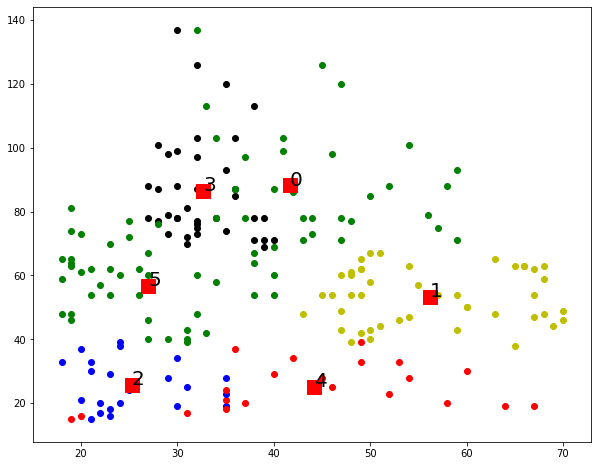

In [76]:
colors = ['g', 'y', 'b', 'k', 'r']
plt.figure(figsize=(10,8))

for element in zipped_list:
    plt.scatter(element[0][0], element[0][1], c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=200, marker="s")

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][0], centroids[i][1]), fontsize=20)

Nice clear separation of the clusters, but I hope that the centroids are just bad plotting on my part.

ValueError: 'c' argument must be a mpl color, a sequence of mpl colors or a sequence of numbers, not o.

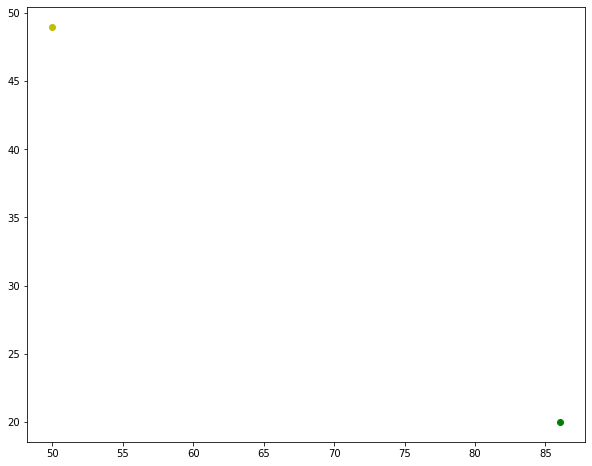

In [79]:
colors = ['g', 'y', 'b', 'k', 'r', 'o']
plt.figure(figsize=(10,8))

for element in zipped_list:
    plt.scatter(element[0][1], element[0][2], c=colors[(element[1] % len(colors))])
    
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', s=200, marker="s")

for i in range(len(centroids)):
    plt.annotate(i, (centroids[i][1], centroids[i][2]), fontsize=20)

### Analysis

Score for 5 clusters is 0.44428597560893024.
Score for 6 clusters is, but the clusters are not clearly separated.

In [78]:
from sklearn.metrics import silhouette_score
print ("Silhoutte score", silhouette_score(data_in, kmeans_model.labels_))

Silhoutte score 0.4523443947724053
